# Imports

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Data Exploration

In [51]:
features_df = pd.read_csv("features_train.csv")

In [5]:
classes_df = pd.read_csv("classes_train.csv")

In [7]:
data_df = pd.concat([features_df, classes_df], axis=1)

In [13]:
classes_df.value_counts()

is_bot
0         1800
1          600
dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    features_df, classes_df, test_size=0.2, random_state=0)

In [53]:
%%time
model = RandomForestClassifier()
model.fit(X_train, y_train)

<timed exec>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


CPU times: total: 562 ms
Wall time: 559 ms


RandomForestClassifier()

In [54]:
predictions = model.predict(X_test)

RandomForest
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       369
           1       0.98      0.98      0.98       111

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480

F1-score:  0.9819819819819819


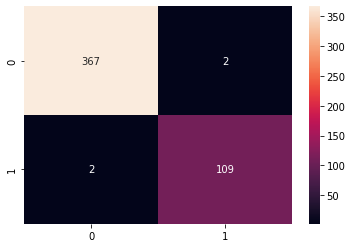

In [57]:
print("RandomForest")
print(classification_report(y_test, predictions))
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d")
print("F1-score: ", f1_score(y_test, predictions))

<AxesSubplot:>

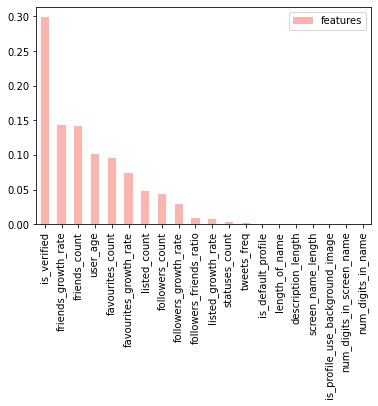

In [58]:
feature_importances = pd.DataFrame(data=model.feature_importances_, index=features_df.columns, columns=['features'])
feature_importances.sort_values(by='features', ascending=False, inplace=True)
feature_importances.plot(kind='bar', colormap='Pastel1')

In [59]:
feature_importances.index[:10]

Index(['is_verified', 'friends_growth_rate', 'friends_count', 'user_age',
       'favourites_count', 'favourites_growth_rate', 'listed_count',
       'followers_count', 'followers_growth_rate', 'followers_friends_ratio'],
      dtype='object')

In [60]:
new_features_df = features_df[list(feature_importances.index[:10])]

In [61]:
# Split data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    new_features_df, classes_df, test_size=0.2, random_state=0)

In [62]:
%%time
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

<timed exec>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


CPU times: total: 562 ms
Wall time: 579 ms


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       369
           1       0.98      0.97      0.98       111

    accuracy                           0.99       480
   macro avg       0.99      0.98      0.99       480
weighted avg       0.99      0.99      0.99       480

F1-score:  0.9773755656108598


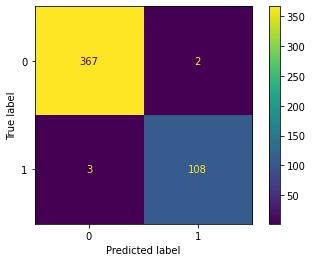

In [71]:
print(classification_report(y_test, predictions))
print("F1-score: ", f1_score(y_test, predictions))
conf_matrix = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix,).plot()
#sns.heatmap(conf_matrix, annot=True, fmt="d")